# ANALYSIS BOTTOM FILMS

In [2]:
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from collections import Counter, defaultdict
import community.community_louvain as community_louvain
import numpy as np
import re

Number of self-loops: 48
Number of nodes: 1762
Number of edges: 2911


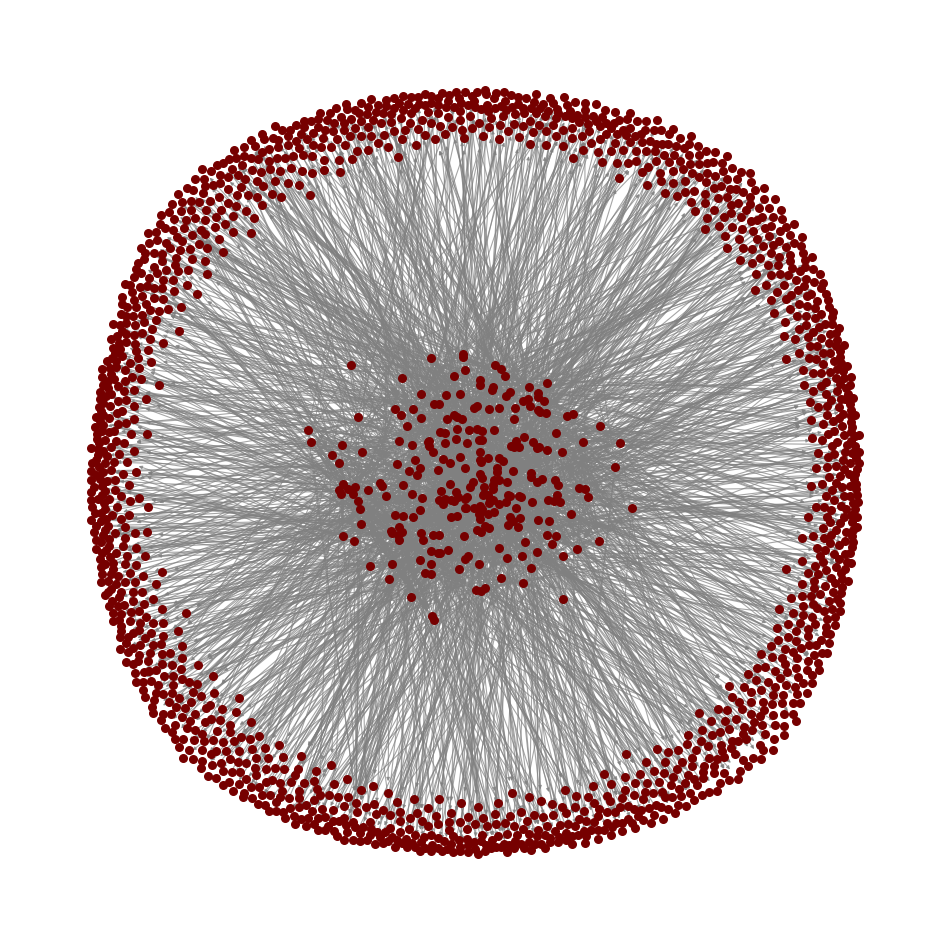

In [3]:
# Load the CSV file into a DataFrame
df = pd.read_csv('bottom_movie_data_with_similar.csv')

# Create an empty directed graph
D = nx.DiGraph()

# Add nodes and edges based on the similarity list
for index, row in df.iterrows():
    film = row['Name']
    similar_films = row['Similar Movies'].split(', ')  # Splitting the similar films into a list
    
    # Add the film as a node (it will be added automatically when creating edges)
    D.add_node(film)
    
    # Add edges between the film and its similar films
    for similar_film in similar_films:
        D.add_edge(film, similar_film)

# Delete self-loops
self_loops = list(nx.selfloop_edges(D))
print("Number of self-loops:", len(self_loops))
D.remove_edges_from(self_loops)

# Num of nodes and edges
print("Number of nodes:", D.number_of_nodes())
print("Number of edges:", D.number_of_edges())

# Plot the graph
plt.figure(figsize=(12, 12))

# Positions for nodes
pos = nx.spring_layout(D, seed=42)  # Layout for consistent

# Draw edges and nodes
nx.draw_networkx_edges(D, pos, edge_color='gray', alpha=0.7, width=0.8, arrowsize=5)
nx.draw_networkx_nodes(D, pos, node_color='#760000', node_size=30)

# plt.title('Top Movies Directed', fontsize=15)
plt.axis('off')
plt.show()

In [ ]:
# Check strong connectivity
is_strongly_connected = nx.is_strongly_connected(D)
print("Is the graph strongly connected?", is_strongly_connected)

# Check weak connectivity
is_weakly_connected = nx.is_weakly_connected(D)
print("Is the graph weakly connected?", is_weakly_connected)

Is the graph strongly connected? False
Is the graph weakly connected? False
Number of strongly connected components: 1635
Number of weakly connected components: 23


Number of nodes in the largest connected component: 1138
Number of edges in the largest connected component: 2033


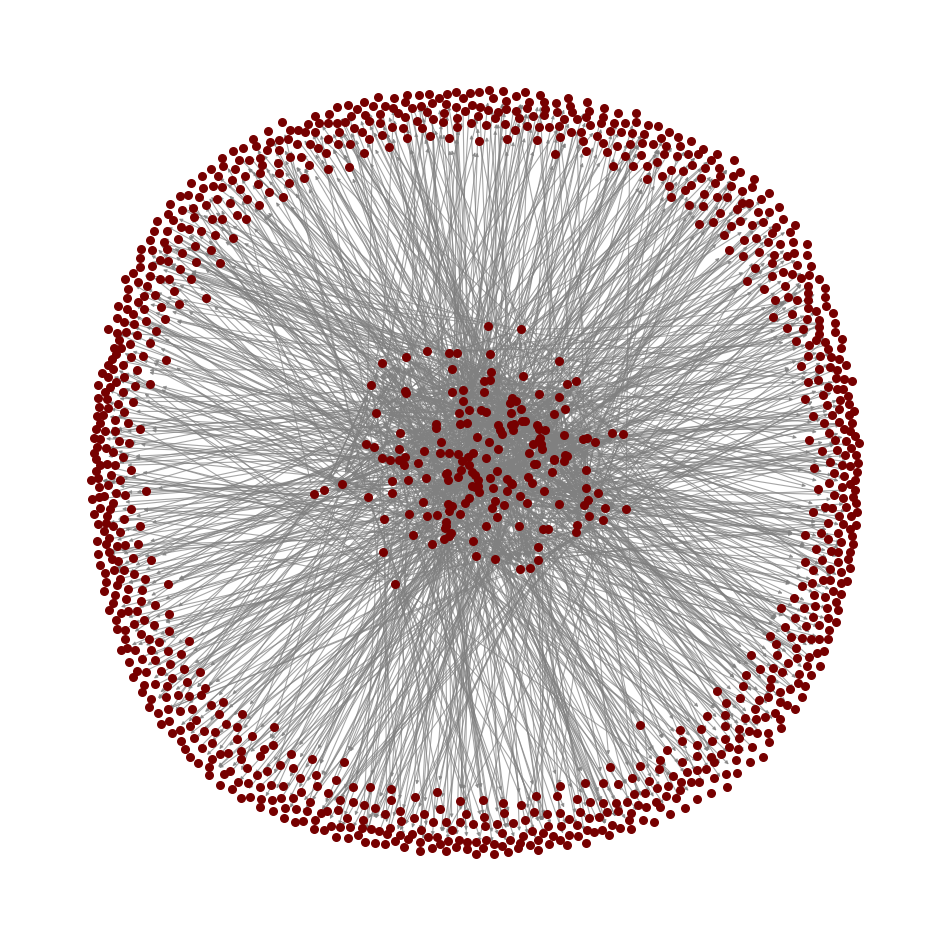

In [11]:
# Get weakly connected components
components = nx.weakly_connected_components(D)

# Find the largest connected component (by number of nodes)
largest_component = max(components, key=len)

# Create a subgraph containing only this component
D_largest = D.subgraph(largest_component).copy()

# Check the properties of the new subgraph
print("Number of nodes in the largest connected component:", D_largest.number_of_nodes())
print("Number of edges in the largest connected component:", D_largest.number_of_edges())

# Optionally, plot the largest connected component
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(D_largest, seed=42)
nx.draw_networkx_edges(D_largest, pos, edge_color='gray', alpha=0.7, width=0.8, arrowsize=5)
nx.draw_networkx_nodes(D_largest, pos, node_color='#760000', node_size=30)
plt.axis('off')
plt.show()


Save all node names in a txt.

<div class="alert alert-warning">
DONT RUN AGAIN!
</div>

In [ ]:
# Save node names to a text file
node_names = list(D_largest.nodes)
with open('bottom   _net_movies_titles.txt', 'w') as file:
    for node in node_names:
        file.write(f"{node}\n")

print(f"Node names have been saved.")

Add metadata to each node as attribute.

In [15]:
# Folder containing the text files
metadata_folder = 'bottom_net_movies_info'

# Function to parse a metadata text file and exclude the "Synopsis" field
def parse_metadata(file_path):
    metadata = {}
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        key = None
        for line in lines:
            line = line.strip()
            if line.endswith(':'):
                key = line[:-1]  # Remove the colon
                if key == 'Synopsis':  # Skip "Synopsis"
                    key = None
                else:
                    metadata[key] = ''
            elif key:  # Append the value to the current key
                metadata[key] += (' ' + line if metadata[key] else line)
    return metadata

# Add metadata to the nodes in the graph
for node in D_largest.nodes():
    # First, assume the filename matches the node title directly
    metadata_file = os.path.join(metadata_folder, f"{node}.txt")
    
    # If the file doesn't exist, try replacing ":", "?" and "/" with "_"
    if not os.path.exists(metadata_file):
        if node == "Naked Gun 33 1/3: The Final Insult":
            sanitized_node = "Naked Gun 33 1_3_ The Final Insult"
            metadata_file = os.path.join(metadata_folder, f"{sanitized_node}.txt")
        elif node == "The Room Actors: Where Are They Now?":
            sanitized_node = "The Room Actors_ Where Are They Now_"
            metadata_file = os.path.join(metadata_folder, f"{sanitized_node}.txt")
        elif node == "Enes Batur: Imagination or Reality?":
            sanitized_node = "Enes Batur_ Imagination or Reality_"
            metadata_file = os.path.join(metadata_folder, f"{sanitized_node}.txt")
        else:
            for char in [':', '?', '/']:
                sanitized_node = node.replace(char, '_')
                metadata_file = os.path.join(metadata_folder, f"{sanitized_node}.txt")
                if os.path.exists(metadata_file):
                    break
    
    # If the file exists, parse the metadata and add it to the node
    if os.path.exists(metadata_file):
        metadata = parse_metadata(metadata_file)
        nx.set_node_attributes(D_largest, {node: metadata})
    else:
        print(f"Metadata file not found for {node}")

In [13]:
# Check attributes of a specific node
sample_node = "After"
if sample_node in D_largest.nodes:
    # Print the metadata of the node in one line each
    for key, value in D_largest.nodes[sample_node].items():
        print(f"{key}: {value}")

Title: After 
Rating: 5.3 
Top 250 Rank: N/A 
Duration: 105 
Release Date: 11 Apr 2019 (Denmark) 
Genres: Drama, Romance 
Director: Jenny Gage 
Actors: Josephine Langford, Hero Fiennes Tiffin, Khadijha Red Thunder, Dylan Arnold, Shane Paul McGhie, Samuel Larsen, Inanna Sarkis, Selma Blair, Pia Mia, Swen Temmel 
Languages: English 
Description: Based on Anna Todd's novel, AFTER follows Tessa (Langford), a dedicated student, dutiful daughter, and loyal girlfriend to her high-school sweetheart, as she enters her first semester in college armed with grand ambitions for her future. Her guarded world opens up when she meets the dark, mysterious Hardin Scott (Tiffin), a magnetic, brooding rebel who makes her question all she thought she knew about herself and what she wants from life. 
Plot: ['A young woman falls for a guy with a dark secret and the two embark on a rocky relationship. Based on the novel by Anna Todd.', "Based on Anna Todd's novel, AFTER follows Tessa (Langford), a dedicated s

Calculate distributions.

Text(0, 0.5, 'Frequency')

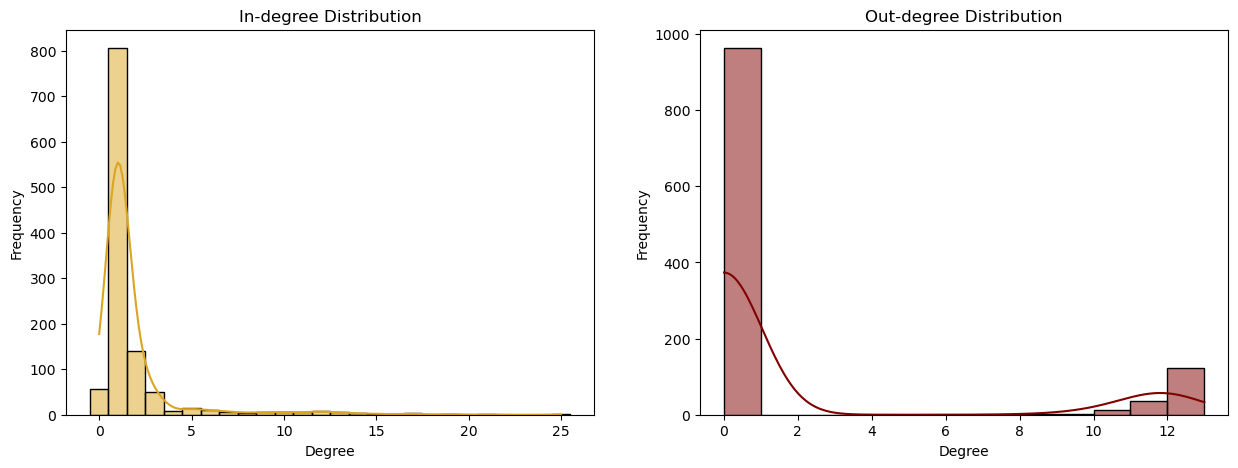

In [16]:
# Get the in-degree and out-degree for each node
in_degrees = [d for n, d in D_largest.in_degree()]
out_degrees = [d for n, d in D_largest.out_degree()]

# Create a pandas Series from the degree lists
in_degree_series = pd.Series(in_degrees)
out_degree_series = pd.Series(out_degrees)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Define bin width and range
binwidth = 1
binrange = (min(in_degrees) - 0.5, max(in_degrees) + 0.5)

# Plot the in-degree distribution as a histogram in the first subplot
sns.histplot(in_degree_series, color='goldenrod', kde=True, ax=ax1, binwidth=binwidth, binrange=binrange)
ax1.set_title("In-degree Distribution")
ax1.set_xlabel("Degree")
ax1.set_ylabel("Frequency")

# Plot the out-degree distribution as a histogram in the second subplot
sns.histplot(out_degree_series, color='maroon', kde=True, ax=ax2, binwidth=binwidth)
ax2.set_title("Out-degree Distribution")
ax2.set_xlabel("Degree")
ax2.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

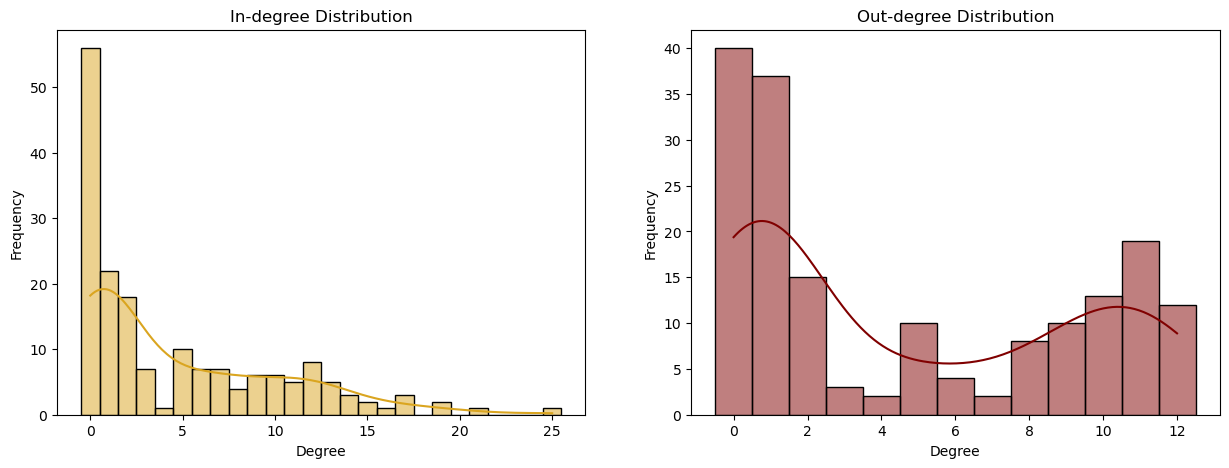

In [17]:
# Make a copy of the graph
H = D_largest.copy()

# Remove the nodes with out-degree = 0
nodes_to_remove = [node for node, out_degree in dict(H.out_degree()).items() if out_degree == 0]
H.remove_nodes_from(nodes_to_remove)

# Get the in-degree and out-degree for each node
in_degrees = [d for n, d in H.in_degree()]
out_degrees = [d for n, d in H.out_degree()]

# Create a pandas Series from the degree lists
in_degree_series = pd.Series(in_degrees)
out_degree_series = pd.Series(out_degrees)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Define bin width and range
binwidth = 1
binrange = (min(in_degrees) - 0.5, max(in_degrees) + 0.5)

# Plot the in-degree distribution as a histogram in the first subplot
sns.histplot(in_degree_series, color='goldenrod', kde=True, ax=ax1, binwidth=binwidth, binrange=binrange)
ax1.set_title("In-degree Distribution")
ax1.set_xlabel("Degree")
ax1.set_ylabel("Frequency")

# Define bin range for out-degrees
binrange = (min(out_degrees) - 0.5, max(out_degrees) + 0.5)

# Plot the out-degree distribution as a histogram in the second subplot
sns.histplot(out_degree_series, color='maroon', kde=True, ax=ax2, binwidth=binwidth, binrange=binrange)
ax2.set_title("Out-degree Distribution")
ax2.set_xlabel("Degree")
ax2.set_ylabel("Frequency")

Print top 5 in and out-degree movies.

In [18]:
# Top 5 nodes with highest in-degree with its genre and rating
in_degrees = dict(H.in_degree())
top_5_indegree = sorted(in_degrees.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes with highest in-degree:")
for node, indegree in top_5_indegree:
    print(f"{node} (In-degree: {indegree})")
    print(f"    Genres: {H.nodes[node].get('Genres')}")
    print(f"    Rating: {H.nodes[node].get('Rating')}")

Top 5 nodes with highest in-degree:
Daniel the Wizard (In-degree: 25)
    Genres: Comedy, Crime, Fantasy, Music 
    Rating: 1.2 
From Justin to Kelly (In-degree: 21)
    Genres: Comedy, Music, Musical, Romance 
    Rating: 1.9 
Cosmic Sin (In-degree: 19)
    Genres: Action, Sci-Fi 
    Rating: 2.5 
Pledge This! (In-degree: 19)
    Genres: Comedy 
    Rating: 1.7 
Who's Your Caddy? (In-degree: 17)
    Genres: Comedy, Sport 
    Rating: 2.3 


In [ ]:
# Top 5 nodes with highest out-degree with its genre and rating
out_degrees = dict(H.out_degree())
top_5_outdegree = sorted(out_degrees.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes with highest out-degree:")
for node, outdegree in top_5_outdegree:
    print(f"{node} (Out-degree: {outdegree})")
    print(f"    Genres: {H.nodes[node].get('Genres')}")
    print(f"    Rating: {H.nodes[node].get('Rating')}")

Top 5 nodes with highest out-degree:
The Human Centipede III (Final Sequence) (Out-degree: 12)
    Genres: Comedy, Horror 
    Rating: 2.7 
Meet the Spartans (Out-degree: 12)
    Genres: Comedy, Fantasy 
    Rating: 2.8 
The Starving Games (Out-degree: 12)
    Genres: Adventure, Comedy, Sci-Fi 
    Rating: 3.2 
Epic Movie (Out-degree: 12)
    Genres: Adventure, Comedy, Fantasy 
    Rating: 2.4 
Date Movie (Out-degree: 12)
    Genres: Comedy, Romance 
    Rating: 2.8 


Make undirected network.

Number of nodes: 1138
Number of edges: 1738


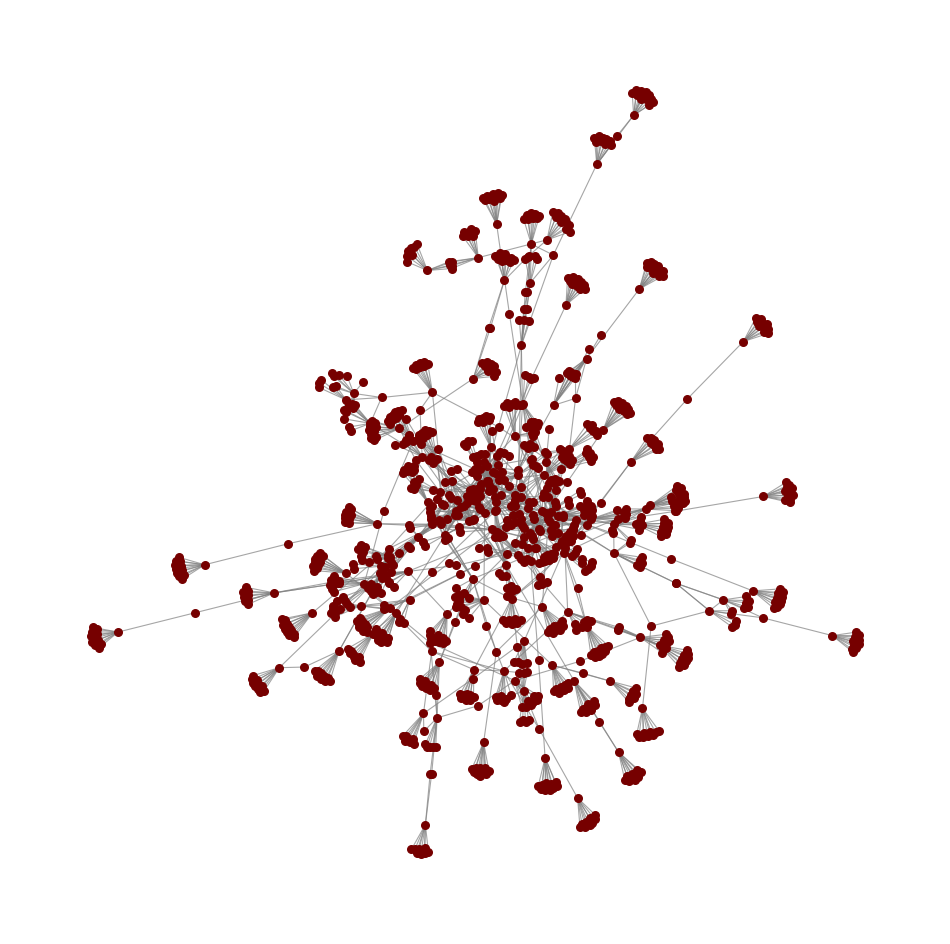

In [21]:
# Make undirected graph
G = D_largest.to_undirected()

# Num of nodes and edges
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

# Plot the graph
plt.figure(figsize=(12, 12))

# Positions for nodes
pos = nx.spring_layout(G, seed=42)  # Layout for consistent

# Draw edges and nodes
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.7, width=0.8)
nx.draw_networkx_nodes(G, pos, node_color='#760000', node_size=30)

# plt.title('Top Movies Undirected', fontsize=15)
plt.axis('off')
plt.show()

In [22]:
# Check if the undirected graph has still attributes
sample_node = "After"
if sample_node in G.nodes:
    # Print the metadata of the node in one line each
    for key, value in G.nodes[sample_node].items():
        print(f"{key}: {value}")

Title: After 
Rating: 5.3 
Top 250 Rank: N/A 
Duration: 105 
Release Date: 11 Apr 2019 (Denmark) 
Genres: Drama, Romance 
Director: Jenny Gage 
Actors: Josephine Langford, Hero Fiennes Tiffin, Khadijha Red Thunder, Dylan Arnold, Shane Paul McGhie, Samuel Larsen, Inanna Sarkis, Selma Blair, Pia Mia, Swen Temmel 
Languages: English 
Description: Based on Anna Todd's novel, AFTER follows Tessa (Langford), a dedicated student, dutiful daughter, and loyal girlfriend to her high-school sweetheart, as she enters her first semester in college armed with grand ambitions for her future. Her guarded world opens up when she meets the dark, mysterious Hardin Scott (Tiffin), a magnetic, brooding rebel who makes her question all she thought she knew about herself and what she wants from life. 
Plot: ['A young woman falls for a guy with a dark secret and the two embark on a rocky relationship. Based on the novel by Anna Todd.', "Based on Anna Todd's novel, AFTER follows Tessa (Langford), a dedicated s

Make communities:
- Genre partition

In [23]:
# Create a dictionary to hold the partition
genre_partition = {}

# Iterate over nodes in the graph and assign them to communities based on their first genre
for node, data in G.nodes(data=True):
    # Get the 'Genres' attribute and split it into a list, if present
    genres = data.get("Genres", "")  # Default to an empty string if 'Genres' is missing
    genres_list = [g.strip() for g in genres.split(",")] if genres else []  # Split and strip spaces
    
    # Get the first genre, or None if no genres are available
    first_genre = genres_list[0] if genres_list else None
    
    # Add node to the appropriate community in the partition
    if first_genre not in genre_partition:
        genre_partition[first_genre] = []
    genre_partition[first_genre].append(node)

print("Total number of genres:", len(genre_partition), "\n")
for genre, nodes in genre_partition.items():
    print(f"{genre}: {len(nodes)} nodes")

Total number of genres: 19 

Comedy: 254 nodes
Action: 341 nodes
Drama: 133 nodes
Crime: 53 nodes
Adventure: 34 nodes
Animation: 16 nodes
Horror: 217 nodes
Fantasy: 11 nodes
Short: 28 nodes
Sci-Fi: 4 nodes
Documentary: 20 nodes
Talk-Show: 1 nodes
None: 6 nodes
Thriller: 4 nodes
Biography: 9 nodes
Mystery: 4 nodes
Family: 1 nodes
Music: 1 nodes
Game-Show: 1 nodes


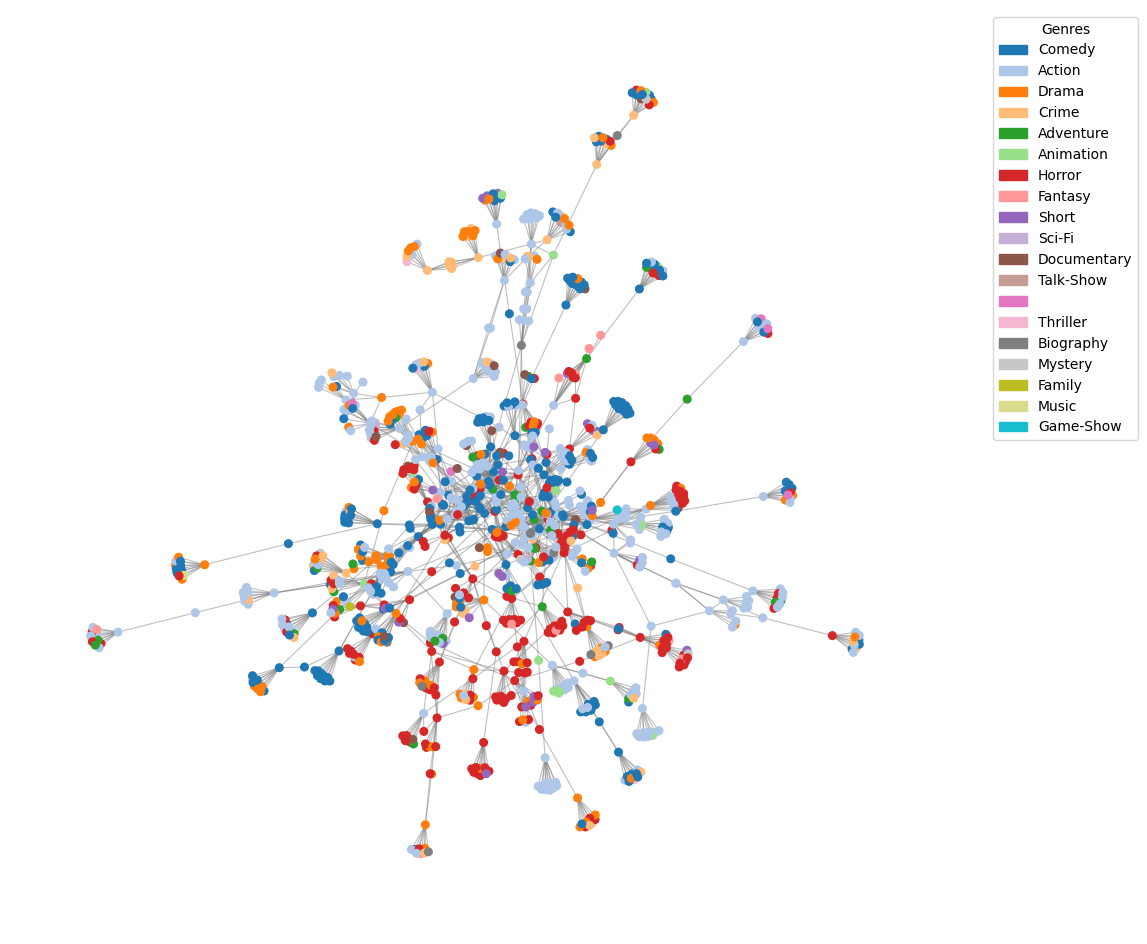

In [24]:
# Create a color map for each genre
genre_to_color = {genre: plt.cm.tab20.colors[i % 20] for i, genre in enumerate(genre_partition.keys())}

# Create a list to store the color of each node based on its genre
node_colors = []
for node in G.nodes:
    # Find the genre of the current node by checking the partition_genre dictionary
    for genre, nodes in genre_partition.items():
        if node in nodes:
            node_colors.append(genre_to_color[genre])  # Assign the corresponding genre color
            break

# Plot the graph with colors based on genre
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # Layout for consistent positioning

# Draw the edges and nodes
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5, width=0.8)
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=30)

# Add a title
#plt.title("Genre Communities in Top Movies", fontsize=15)

# Create legend
legend_handles = [mpatches.Patch(color=color, label=genre) for genre, color in genre_to_color.items()]
plt.legend(handles=legend_handles, title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.axis('off')
plt.show()

Calculate the modularity of the genre-based partition.

In [25]:
# Calculate L (total links) in the entire network
L = G.number_of_edges()

# Calculate modularity using the formula from chapter 9
modularity_genre = 0
for community in genre_partition.values():
    subgraph = G.subgraph(community)
    
    # L_c: Count of edges within the community
    L_c = subgraph.number_of_edges()
    
    # k_c: Total degree of the nodes in this community
    k_c = sum(deg for node, deg in subgraph.degree())

    # Calculate modularity contribution for this community 
    # (L_C/L is the fraction of edges within the community, and k_c/(2L) is the expected fraction of edges in a random network)
    modularity_genre += ((L_c / L) - (k_c / (2 * L)) ** 2)

print("Modularity of the genre-based partition (formula book):", modularity_genre)

Modularity of the genre-based partition (formula book): 0.4116320890512089


In [ ]:
# Modularity using NetworkX
modularity_genre2 = nx.algorithms.community.modularity(G, [set(nodes) for nodes in genre_partition.values()])
print("Modularity of the genre-based partition (networkX formula):", modularity_genre2)

Modularity of the genre-based partition (networkX formula): 0.25284624735652395


- Director partition

In [27]:
# Create a dictionary to hold the partition
director_partition = {}

# Iterate over nodes in the graph and assign them to communities based on their first genre
for node, data in G.nodes(data=True):
    # Get the 'Directors' attribute and split it into a list, if present
    directors = data.get("Director", "")  # Default to an empty string if 'Genres' is missing
    directors_list = [g.strip() for g in directors.split(",")] if directors else []  # Split and strip spaces
    
    # Get the first genre, or None if no genres are available
    first_director = directors_list[0] if directors_list else None
    
    # Add node to the appropriate community in the partition
    if first_director not in director_partition:
        director_partition[first_director] = []
    director_partition[first_director].append(node)

print("Total number of directors:", len(director_partition), "\n")
for director, nodes in director_partition.items():
    print(f"{director}: {len(nodes)} nodes")

Total number of directors: 778 

Deon Taylor: 2 nodes
Michael Tiddes: 4 nodes
Benny Boom: 1 nodes
Christopher Erskin: 1 nodes
Scott Zabielski: 1 nodes
George Ratliff: 1 nodes
Malcolm D. Lee: 3 nodes
M. Night Shyamalan: 1 nodes
Leslie Small: 1 nodes
Tim Story: 1 nodes
D-Shot: 1 nodes
Nick Cannon: 1 nodes
James Foley: 2 nodes
Sam Taylor-Johnson: 1 nodes
None: 81 nodes
Drake Doremus: 1 nodes
Jenny Gage: 1 nodes
Barbara Bialowas: 3 nodes
Roger Kumble: 1 nodes
Castille Landon: 3 nodes
Bill Condon: 2 nodes
Jeff Wadlow: 2 nodes
Shûsuke Kaneko: 1 nodes
McG: 3 nodes
Shinsuke Sato: 1 nodes
Vincenzo Natali: 1 nodes
Jonathan Demme: 1 nodes
James DeMonaco: 1 nodes
Ciarán Foy: 2 nodes
Keenen Ivory Wayans: 4 nodes
Paris Barclay: 1 nodes
Brian Robbins: 2 nodes
Raja Gosnell: 1 nodes
Mike Leigh: 1 nodes
John Whitesell: 1 nodes
David Zucker: 4 nodes
James Isaac: 1 nodes
Adam Marcus: 1 nodes
John Carl Buechler: 3 nodes
Rob Hedden: 1 nodes
Tom McLoughlin: 1 nodes
Danny Steinmann: 1 nodes
Ronny Yu: 1 nodes


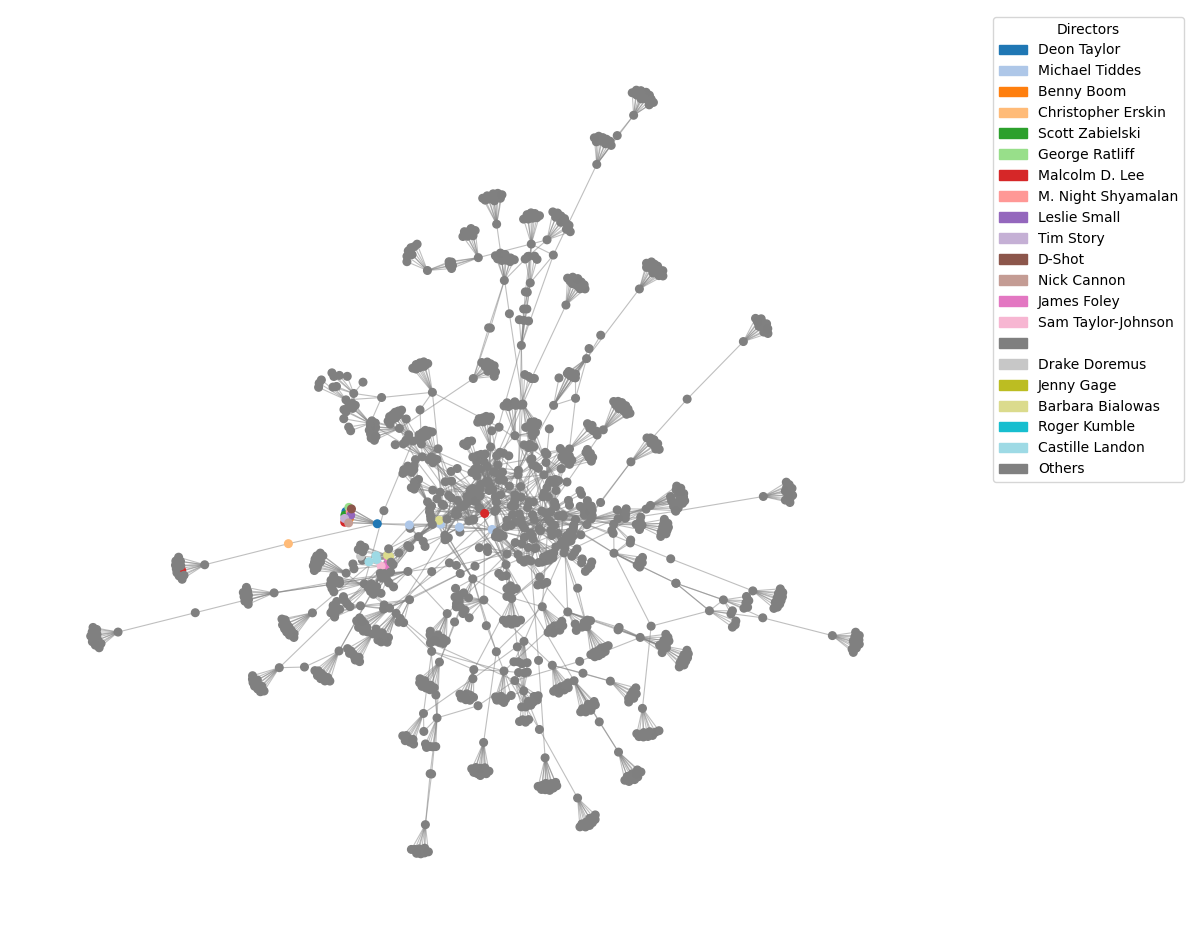

In [28]:
# Create a color map for each director (top 20)
director_to_color = {director: plt.cm.tab20.colors[i % 20] for i, director in enumerate(list(director_partition.keys())[:20])}

# Create a list to store the color of each node based on its director
node_colors = []
for node in G.nodes:
    # Find the director of the current node by checking the partition_director dictionary
    for director, nodes in director_partition.items():
        if node in nodes:
            node_colors.append(director_to_color.get(director, 'gray'))  # Assign the corresponding director color
            break

# Plot the graph with colors based on director
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # Layout for consistent

# Draw the edges and nodes
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5, width=0.8)
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=30)

# Add a title
#plt.title("Top 20 Director Communities in Top Movies", fontsize=15)

# Create a legend for top 10 directors and gray for others
legend_handles = [mpatches.Patch(color=color, label=director) for director, color in director_to_color.items()]
legend_handles.append(mpatches.Patch(color='gray', label='Others'))
plt.legend(handles=legend_handles, title="Directors", bbox_to_anchor=(1.05, 1), loc='upper left')

# Remove axis
plt.axis('off')

# Display the plot
plt.show()

Calculate modularity of the director based communities.

In [29]:
# Calculate L (total links) in the entire network
L = G.number_of_edges()

# Calculate modularity using the formula from chapter 9
modularity_director = 0
for community in director_partition.values():
    subgraph = G.subgraph(community)
    
    # L_c: Count of edges within the community
    L_c = subgraph.number_of_edges()
    
    # k_c: Total degree of the nodes in this community
    k_c = sum(deg for node, deg in subgraph.degree())

    # Calculate modularity contribution for this community 
    # (L_C/L is the fraction of edges within the community, and k_c/(2L) is the expected fraction of edges in a random network)
    modularity_director += ((L_c / L) - (k_c / (2 * L)) ** 2)

print("Modularity of the director-based partition (formula book):", modularity_director)

Modularity of the director-based partition (formula book): 0.06026032859218103


In [30]:
# Modularity using NetworkX
modularity_director2 = nx.algorithms.community.modularity(G, [set(nodes) for nodes in director_partition.values()])
print("Modularity of the director-based partition (networkX formula):", modularity_director2)

Modularity of the director-based partition (networkX formula): 0.05470042149952129


- Louvain partition

In [31]:
# Compute the Louvain partition
louvain_partition = community_louvain.best_partition(G)

# Group nodes by their assigned community
community_groups = defaultdict(list)
for node, community in louvain_partition.items():
    community_groups[community].append(node)

print("Number of communities:", len(community_groups), "\n")
for community_id, nodes in community_groups.items():
    print(f"Community {community_id}: {len(nodes)} nodes")

Number of communities: 32 

Community 0: 24 nodes
Community 1: 63 nodes
Community 2: 40 nodes
Community 3: 42 nodes
Community 6: 74 nodes
Community 5: 27 nodes
Community 7: 45 nodes
Community 8: 33 nodes
Community 9: 81 nodes
Community 10: 25 nodes
Community 12: 65 nodes
Community 13: 33 nodes
Community 14: 49 nodes
Community 15: 68 nodes
Community 16: 30 nodes
Community 17: 13 nodes
Community 18: 23 nodes
Community 19: 52 nodes
Community 20: 30 nodes
Community 21: 13 nodes
Community 22: 47 nodes
Community 23: 52 nodes
Community 24: 12 nodes
Community 25: 12 nodes
Community 26: 62 nodes
Community 27: 24 nodes
Community 28: 29 nodes
Community 30: 13 nodes
Community 31: 12 nodes
Community 11: 12 nodes
Community 4: 22 nodes
Community 29: 11 nodes


C:\Users\Alba\AppData\Local\Temp\ipykernel_25520\3809391496.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_palette = plt.cm.get_cmap('tab20', num_communities)  # Use 'tab20' for up to 20 colors


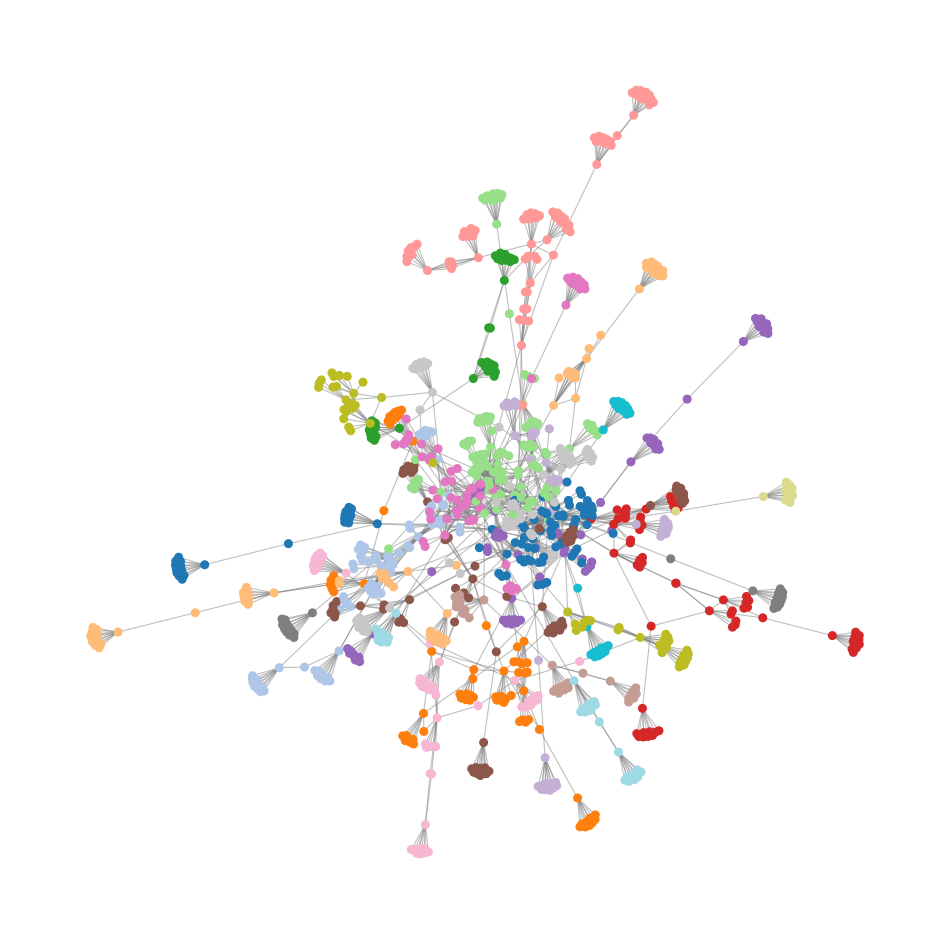

In [32]:

# Assign a unique color to each community
num_communities = len(community_groups)
color_palette = plt.cm.get_cmap('tab20', num_communities)  # Use 'tab20' for up to 20 colors
community_to_color = {community: color_palette(i) for i, community in enumerate(community_groups.keys())}

# Create a list of colors for each node based on its community
node_colors = [community_to_color[louvain_partition[node]] for node in G.nodes]

# Plot the graph with nodes colored by community
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # Layout for consistent positioning

# Draw the edges and nodes
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5, width=0.8)
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=30)

# # Add a title
# plt.title("Communities in Top Movies (Louvain Method)", fontsize=15)

# Remove axis
plt.axis('off')

# Display the plot
plt.show()

Calculate modularity of the director based communities.

In [33]:
# Calculate modularity for the Louvain partition
modularity_louvain = community_louvain.modularity(louvain_partition, G)
print("Modularity of Louvain partition:", modularity_louvain)

Modularity of Louvain partition: 0.848725304934974


Calculate confussion matrix of genre partition vs louvain partition.

In [34]:
# Modify the nodes info to get it as list instead of string
G2 = nx.Graph(G)

# Modify the nodes to have lists of genres and directors
for node in G2.nodes:
    # Get the current node data
    data = G2.nodes[node]
    
    # Get the genres and directors as strings
    genres = data.get("Genres", "")
    directors = data.get("Director", "")
    actors = data.get("Actors", "")
    producers = data.get("Producer", "")
    production_companies = data.get("Production Companies", "")
    
    # Split the strings into lists
    genres_list = [g.strip() for g in genres.split(",")] if genres else []
    directors_list = [d.strip() for d in directors.split(",")] if directors else []
    actors_list = [a.strip() for a in actors.split(",")] if actors else []
    producers_list = [p.strip() for p in producers.split(",")] if producers else []
    production_companies_list = [pc.strip() for pc in production_companies.split(",")] if production_companies else []

    # Update the node data with the lists
    data["Genres"] = genres_list
    data["Director"] = directors_list
    data["Actors"] = actors_list
    data["Producer"] = producers_list
    data["Production Companies"] = production_companies_list

# Check the updated node data for a sample node
sample_node = "A Beautiful Mind"
if sample_node in G2.nodes:
    # Print the metadata of the node in one line each
    for key, value in G2.nodes[sample_node].items():
        print(f"{key}: {value}")

In [35]:
# Get the 10 most common genres
most_common_genres = sorted(genre_partition.keys(), key=lambda g: len(genre_partition[g]), reverse=True)[:10]

# Get 10 biggest communities
community_count = pd.Series(louvain_partition).value_counts()
most_common_communities = community_count.nlargest(10).index.tolist()

# Confusion matrix
D_matrix = np.zeros((len(most_common_genres), len(most_common_communities)), dtype=int)

for node in G2.nodes():
    # Get the genres directly from the node attributes
    node_genres = G2.nodes[node]['Genres']  # List of genres for the node
    node_community = louvain_partition[node]  # Community ID for the node
    
    # Check if the community is one of the largest ones
    if node_community in most_common_communities:
        community_index = most_common_communities.index(node_community)
        
        # Count all genres of this node
        for genre in node_genres:
            if genre in most_common_genres:
                genre_index = most_common_genres.index(genre)
                D_matrix[genre_index, community_index] += 1  # Increment the count in the matrix

# Display the confusion matrix
D_df = pd.DataFrame(D_matrix, index=most_common_genres, columns=most_common_communities)
print("Confusion Matrix (Genres vs Communities):")
print(D_df)


Confusion Matrix (Genres vs Communities):
             9   6   15  12  1   26  23  19  14  22
Action       32   5   7  52  30  30   4   1  21  16
Comedy       37   6   3   9  26  42   4   1  14  23
Horror       31  60  50  14  11   1  34  49   5  12
Drama        17  33  16  12  12  36  20   3  24  13
Crime         5   8   1  14  12  12   6   1  18   9
Adventure     8   7   5  26  25   7   2   2   4   7
Short         7   1   2   1   3   0   3   1   0   1
Documentary   4   1   0   1   2   0   0   1   1   2
Animation     1   1   0   3   0   0   0   1   2   0
Fantasy       9   8   3  17  17   3   3   4   3   6
